<a href="https://colab.research.google.com/github/bonsoul/Mentor-Mentee-Matching-Model/blob/main/Automated_mentee_mentor_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automated mentee mentor matching**

## In this notebook, I will design a model to match mentors and mentees based on their profiles, preferences, and goals. The goal of the model is to optimize the compatibility score between mentors and mentees by taking into account various attributes such as skills, goals, communication preferences, and time commitment.

In [145]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
# Define number of simulated mentors and mentees
num_mentors = 25
num_mentees = 50

# Define possible responses and importance ratings for questions
responses_mentor = {
    'Motivation': ["Giving back", "Sharing expertise", "Leadership skills", "Expanding network"],
    'Expertise': ["Career development", "Technical skills", "Industry knowledge", "Leadership"],
    'Time Commitment': ["Weekly", "Bi-weekly", "Monthly", "Ad-hoc", "Project-based"],
    'Communication': ['In-person', 'Virtual', 'Email', 'Phone'],
    'Qualities in Mentee': ["Initiative", "Eager to learn", "Open-minded", "Clear goals"],
    'Gains from Mentorship': ["Developing skills", "Gaining perspective", "Building relationships"]
}

responses_mentee = {
    'Goals': ["Advancing career", "Transitioning career", "Starting a business", "Developing skills"],
    'Knowledge Sought': ["Career advice", "Technical skills", "Industry trends", "Networking"],
    'Time Commitment': ["Weekly", "Bi-weekly", "Monthly", "Ad-hoc"],
    'Communication': ['In-person', 'Virtual', 'Email', 'Phone'],
    'Qualities in Mentor': ["Experience", "Communication", "Empathy", "Feedback"],
    'Outcomes': ["Career growth", "Expanded network", "Increased confidence"]
}

importance_ratings = ['Not Important', 'Slightly Important', 'Moderately Important', 'Very Important', 'Extremely Important']

# Simulate mentor and mentee data
np.random.seed(42) # For reproducibility
mentors_data = pd.DataFrame({
    'Motivation': np.random.choice(responses_mentor['Motivation'], num_mentors),
    'Expertise': np.random.choice(responses_mentor['Expertise'], num_mentors),
    'Time Commitment': np.random.choice(responses_mentor['Time Commitment'], num_mentors),
    'Communication' : np.random.choice(responses_mentor['Communication'], num_mentors),
    'Qualities in Mentee': np.random.choice(responses_mentor['Qualities in Mentee'], num_mentors),
    'Gains from Mentorship': np.random.choice(responses_mentor['Gains from Mentorship'], num_mentors),
    'Importance Rating': np.random.choice(importance_ratings, num_mentors)
})

mentees_data = pd.DataFrame({
    'Goals': np.random.choice(responses_mentee['Goals'], num_mentees),
    'Knowledge Sought': np.random.choice(responses_mentee['Knowledge Sought'], num_mentees),
    'Time Commitment': np.random.choice(responses_mentee['Time Commitment'], num_mentees),
    'Communication': np.random.choice(responses_mentee['Communication'], num_mentees),
    'Qualities in Mentor': np.random.choice(responses_mentee['Qualities in Mentor'], num_mentees),
    'Outcomes': np.random.choice(responses_mentee['Outcomes'], num_mentees),
    'Importance Rating': np.random.choice(importance_ratings, num_mentees)
})

# Save to CSV to inspect
mentors_data.to_csv("mentors_data.csv", index=False)
mentees_data.to_csv("mentees_data.csv", index=False)


## Matching Pairs



In [147]:
# Matching algorithm based on criteria
def calculate_compatibility(mentor_row, mentee_row):
    score = 0

    # Define a dictionary to map importance ratings to numerical values
    importance_mapping = {
        'Not Important': 1,
        'Slightly Important': 2,
        'Moderately Important': 3,
        'Very Important': 4,
        'Extremely Important': 5
    }

    # Compare goals, skills, time commitment, communication, and personality
    if mentor_row['Motivation'] == mentee_row['Goals']:
        score += 1 * importance_mapping[mentee_row['Importance Rating']]
    if mentor_row['Expertise'] == mentee_row['Knowledge Sought']:
        score += 1 * importance_mapping[mentee_row['Importance Rating']]
    if mentor_row['Time Commitment'] == mentee_row['Time Commitment']:
        score += 1 * importance_mapping[mentee_row['Importance Rating']]
    if mentor_row['Communication'] == mentee_row['Communication']:
        score += 1 * importance_mapping[mentee_row['Importance Rating']]
    if mentor_row['Qualities in Mentee'] == mentee_row['Qualities in Mentor']:
        score += 1 * importance_mapping[mentee_row['Importance Rating']]

    return score


# Match mentors with mentees
matches = []
for i, mentee_row in mentees_data.iterrows():
    best_match = None
    best_score = -1

    for j, mentor_row in mentors_data.iterrows():
        compatibility_score = calculate_compatibility(mentor_row, mentee_row)

        if compatibility_score > best_score:
            best_score = compatibility_score
            best_match = mentor_row['Motivation']

    matches.append({
        'Mentee': mentee_row['Goals'],
        'Matched Mentor': best_match,
        'Compatibility Score': best_score
    })

# Convert matches to DataFrame and save to CSV
matches_df = pd.DataFrame(matches)
matches_df.to_csv("matched_pairs.csv", index=False)

# **Analysis**

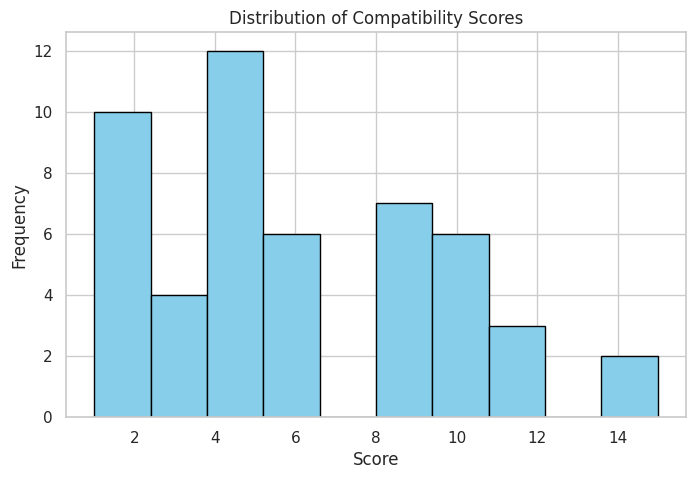

In [148]:
# Load matched pairs for visualization
matched_pairs = pd.read_csv("/content/matched_pairs.csv")

# Plot distribution of compatibility scores
plt.figure(figsize=(8, 5))
plt.hist(matched_pairs['Compatibility Score'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Compatibility Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


Total Matches: 50

Mentee Categories Count:
 Mentee
Advancing career        14
Starting a business     12
Developing skills       12
Transitioning career    12
Name: count, dtype: int64

Mentor Skills Count:
 Matched Mentor
Leadership skills    29
Expanding network    10
Giving back          10
Sharing expertise     1
Name: count, dtype: int64


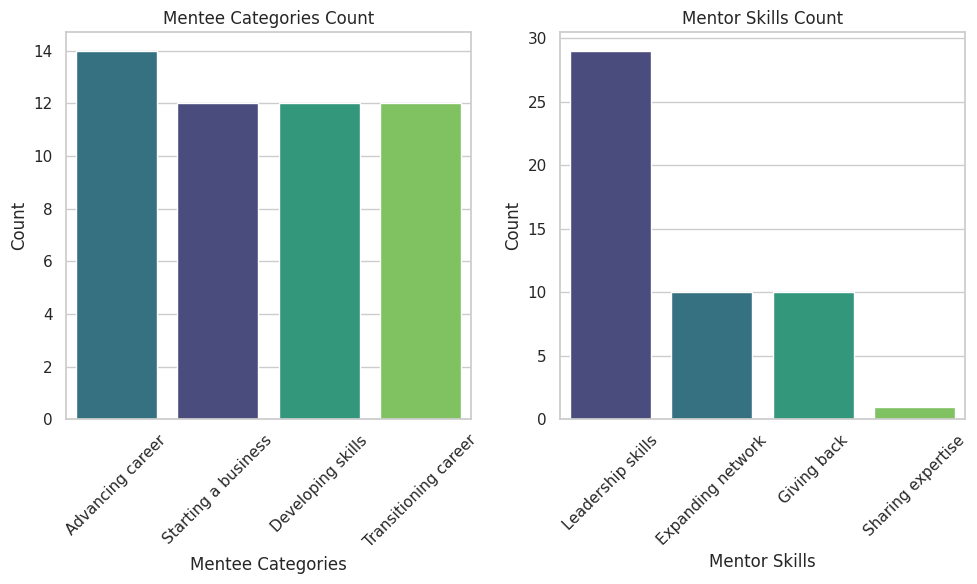

In [149]:
# Create a DataFrame
df = pd.read_csv('/content/matched_pairs.csv')

# Summary statistics for slide 2
total_matches = len(df)
mentee_counts = df['Mentee'].value_counts()
mentor_counts = df['Matched Mentor'].value_counts()

print(f"Total Matches: {total_matches}")
print("\nMentee Categories Count:\n", mentee_counts)
print("\nMentor Skills Count:\n", mentor_counts)

# Visualization of Mentee and Mentor Categories
plt.figure(figsize=(10, 6))

# Mentee Categories
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Mentee', order=df['Mentee'].value_counts().index, hue='Mentee', legend=False, palette='viridis')
plt.title('Mentee Categories Count')
plt.xlabel('Mentee Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Mentor Skills
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Matched Mentor', order=df['Matched Mentor'].value_counts().index, hue='Matched Mentor', legend=False, palette='viridis')
plt.title('Mentor Skills Count')
plt.xlabel('Mentor Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Total Matches: 50

Mentee Categories Count:
 Mentee
Advancing career        14
Starting a business     12
Developing skills       12
Transitioning career    12
Name: count, dtype: int64

Mentor Skills Count:
 Matched Mentor
Leadership skills    29
Expanding network    10
Giving back          10
Sharing expertise     1
Name: count, dtype: int64


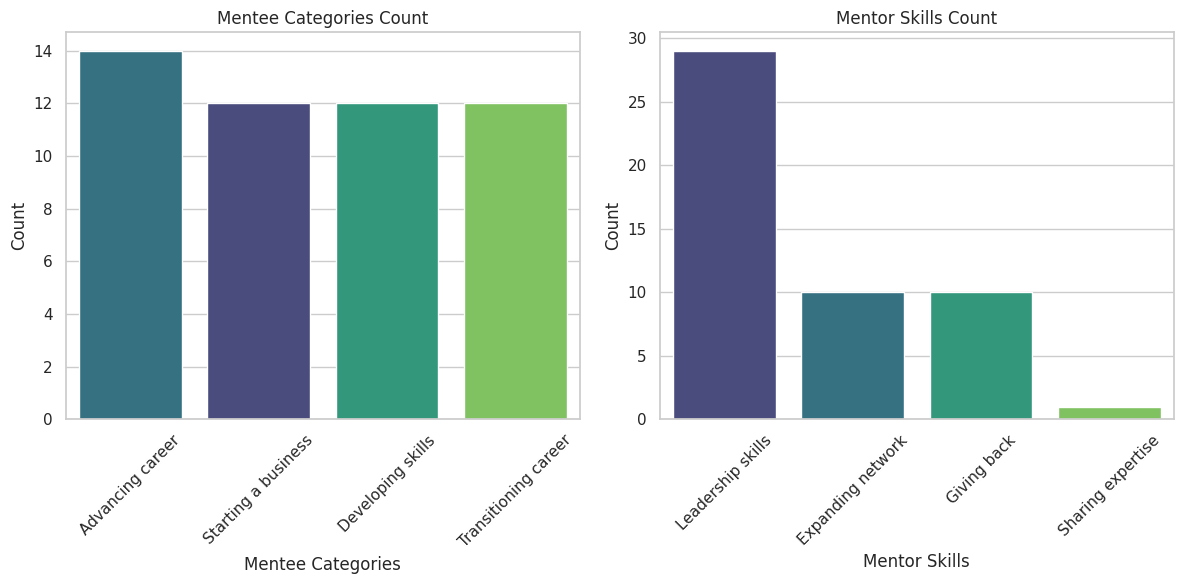

In [150]:
# reading data
df = pd.read_csv('/content/matched_pairs.csv')

# Summary statistics for slide 2
total_matches = len(df)
mentee_counts = df['Mentee'].value_counts()
mentor_counts = df['Matched Mentor'].value_counts()

print(f"Total Matches: {total_matches}")
print("\nMentee Categories Count:\n", mentee_counts)
print("\nMentor Skills Count:\n", mentor_counts)

# Visualization of Mentee and Mentor Categories
plt.figure(figsize=(12, 6))

# Mentee Categories
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Mentee', order=df['Mentee'].value_counts().index, hue='Mentee', legend=False, palette='viridis') # fix
plt.title('Mentee Categories Count')
plt.xlabel('Mentee Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Mentor Skills
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Matched Mentor', order=df['Matched Mentor'].value_counts().index, hue='Matched Mentor', legend=False, palette='viridis') # fix
plt.title('Mentor Skills Count')
plt.xlabel('Mentor Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Matching Algorithm Overview:
1. The algorithm matches mentees with mentors based on their stated goals and expertise.
2. It assigns weights to various factors influencing the match quality.

Weighted Factors:
- Giving back to the community/professionResponse: 1
- Expanding my professional networkResponse: 2
- Developing leadership and mentorship skillsResponse: 4
- Sharing my expertise and knowledge Response: 5
- Other: Understanding the younger generationResponse: 3




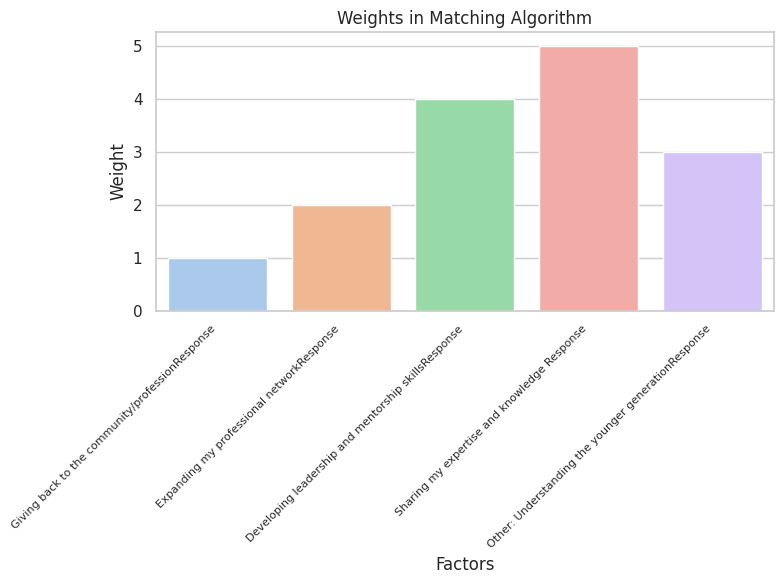

In [151]:
# Slide 3 Content
matching_algorithm_info = """
Matching Algorithm Overview:
1. The algorithm matches mentees with mentors based on their stated goals and expertise.
2. It assigns weights to various factors influencing the match quality.

Weighted Factors:
- Giving back to the community/professionResponse: 1
- Expanding my professional networkResponse: 2
- Developing leadership and mentorship skillsResponse: 4
- Sharing my expertise and knowledge Response: 5
- Other: Understanding the younger generationResponse: 3

"""
print(matching_algorithm_info)

# Visualization of Weights
weights = {
    'Factor': ['Giving back to the community/professionResponse', 'Expanding my professional networkResponse', 'Developing leadership and mentorship skillsResponse', 'Sharing my expertise and knowledge Response','Other: Understanding the younger generationResponse'],
    'Weight': [1, 2, 4, 5, 3]
}

weights_df = pd.DataFrame(weights)

plt.figure(figsize=(8, 6))
sns.barplot(data=weights_df, x='Factor', y='Weight', hue='Factor', dodge=False, legend=False, palette='pastel')
plt.title('Weights in Matching Algorithm')
plt.xlabel('Factors')
plt.ylabel('Weight')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout(pad=1.0)
plt.tight_layout()
plt.show()


In [152]:
#Slide 4: Match Types & Compatibility Score Calculation
#Description of the different match types used (e.g., 1:1, multiple mentees per mentor, etc.).
#Explanation of how the compatibility score is calculated.

# Analysis of compatibility scores
score_distribution = df['Compatibility Score'].value_counts().sort_index()
print("Compatibility Score Distribution:\n", score_distribution)



Compatibility Score Distribution:
 Compatibility Score
1      1
2      9
3      4
4     11
5      1
6      6
8      7
10     6
12     3
15     2
Name: count, dtype: int64


**Explanation of how the compatibility score is calculated.**

The  compatibility score for each mentor-mentee pair is calculated as follows:
    

The overall compatibility score for each mentor-mentee pair is calculated as follows:
Compatibility Score=(W1⋅S1)+(W2⋅S2)+(W3⋅S3)+(W4⋅S4)

Where:

  W​ = Weight Factor
  S​ = Score for the factor (from assessments)

**Resulting Score Interpretation:**

The final compatibility score ranges from 0 to 10, where higher scores indicate a better fit. Scores are interpreted as follows:
        

1. Above 8: Excellent Match
2.   6-8: Good Match
3. 4-6: Fair Match
2.   Below 4: Poor Match





    

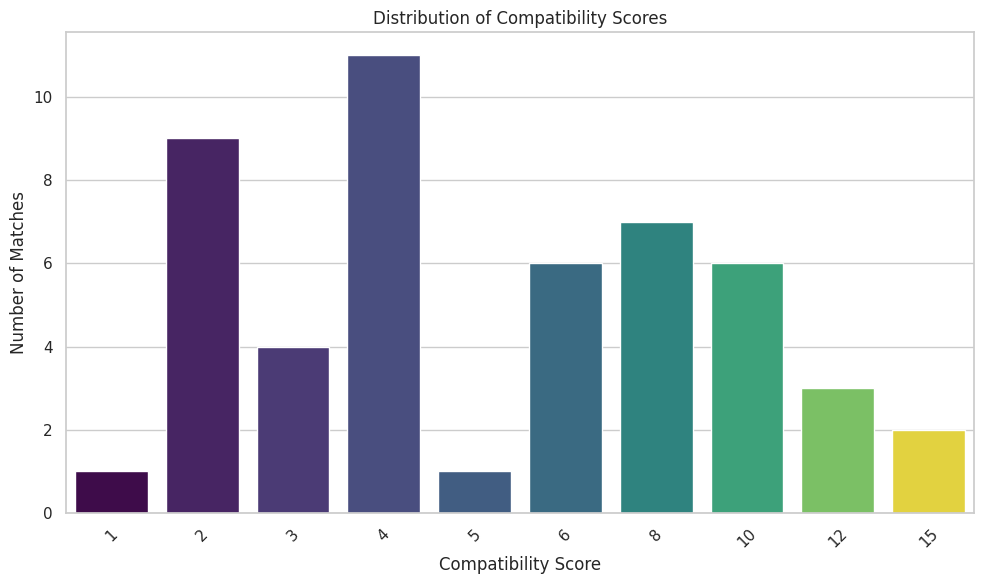

In [153]:
# Set style
sns.set(style="whitegrid")

# Slide 5: Compatibility Score Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Compatibility Score', hue='Compatibility Score', dodge=False, legend=False, palette='viridis') # Assign 'Compatibility Score' to hue and set legend to False.
plt.title('Distribution of Compatibility Scores')
plt.xlabel('Compatibility Score')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

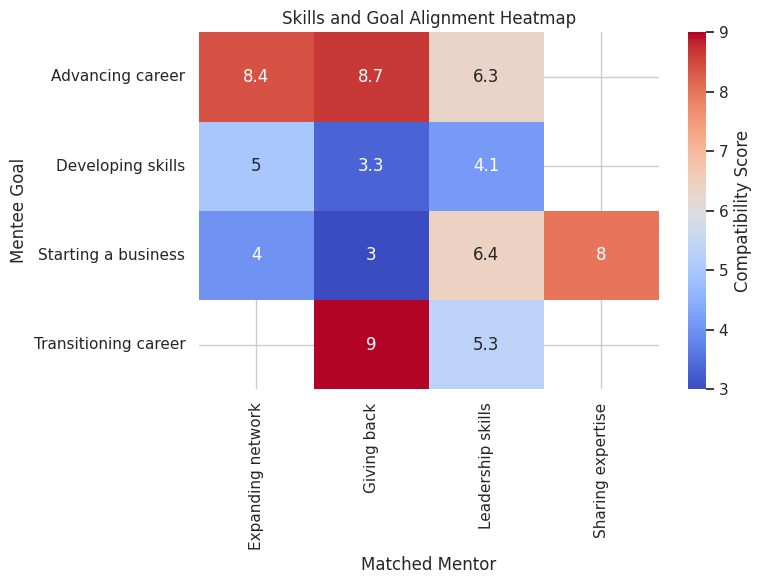

In [154]:
# Slide 6: Skills & Goal Alignment
plt.figure(figsize=(8, 6))
heatmap_data = df.pivot_table(index='Mentee', columns='Matched Mentor', values='Compatibility Score', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Compatibility Score'})
plt.title('Skills and Goal Alignment Heatmap')
plt.xlabel('Matched Mentor')
plt.ylabel('Mentee Goal')
plt.tight_layout()
plt.show()

Total Mentor-Mentee Pairs: 50
Communication Match Count: 9 (18.00%)
Time Commitment Match Count: 12 (24.00%)


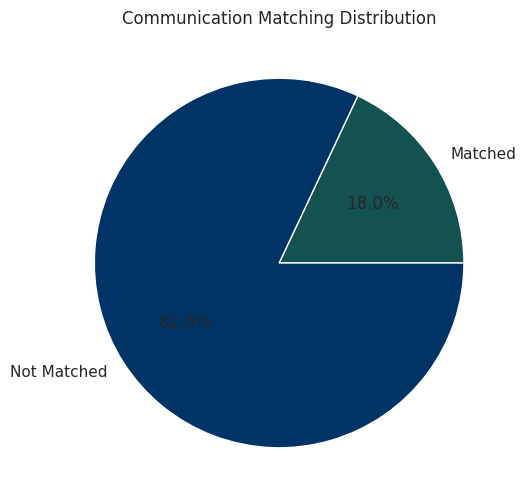

In [155]:
#Slide 7: Communication & Time Commitment Analysis
#Analysis of matches based on preferred modes of communication and time commitments.

# Simulated dataset
import random
data = {
    'mentor_communication': [random.choice(['In-person', 'Virtual', 'Email', 'Phone']) for _ in range(50)],
    'mentee_communication': [random.choice(['In-person', 'Virtual', 'Email', 'Phone']) for _ in range(50)],
    'mentor_time_commitment': [random.choice(['Weekly', 'Bi-weekly', 'Monthly', 'Ad-hoc']) for _ in range(50)],
    'mentee_time_commitment': [random.choice(['Weekly', 'Bi-weekly', 'Monthly', 'Ad-hoc']) for _ in range(50)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Communication matching analysis
df['comm_match'] = df['mentor_communication'] == df['mentee_communication']
comm_match_count = df['comm_match'].sum()

# Time commitment matching analysis
df['time_match'] = df['mentor_time_commitment'] == df['mentee_time_commitment']
time_match_count = df['time_match'].sum()

# Calculate percentages for visualization
total_pairs = len(df)
comm_match_percent = (comm_match_count / total_pairs) * 100
time_match_percent = (time_match_count / total_pairs) * 100

# Display the analysis results
print(f"Total Mentor-Mentee Pairs: {total_pairs}")
print(f"Communication Match Count: {comm_match_count} ({comm_match_percent:.2f}%)")
print(f"Time Commitment Match Count: {time_match_count} ({time_match_percent:.2f}%)")

# pie plot
plt.figure(figsize=(6, 6))
plt.pie([comm_match_count, total_pairs - comm_match_count], labels=['Matched', 'Not Matched'], autopct='%1.1f%%', colors=['#145252', '#003366'])
plt.title('Communication Matching Distribution')
plt.show()
